Model Evaluation:
MAE: 1.71
MSE: 2.9240999999999997
R2 Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


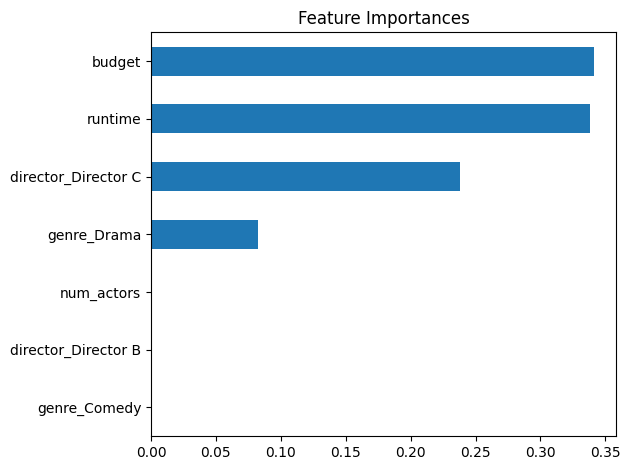

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load Data (Replace this with your actual data source)

data = {
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D'],
    'genre': ['Action', 'Comedy', 'Drama', 'Action'],
    'director': ['Director A', 'Director B', 'Director A', 'Director C'],
    'actors': ['Actor X, Actor Y', 'Actor Z, Actor W', 'Actor Y, Actor W', 'Actor X, Actor Z'],
    'budget': [100, 20, 50, 80],
    'runtime': [120, 90, 110, 130],
    'rating': [7.5, 6.0, 8.0, 7.0]
}
df = pd.DataFrame(data)

# Step 3: Preprocessing

df_encoded = df.copy()

# One-hot encode genre and director
df_encoded = pd.get_dummies(df_encoded, columns=['genre', 'director'], drop_first=True)

# Feature: Number of actors
df_encoded['num_actors'] = df_encoded['actors'].apply(lambda x: len(x.split(',')))

# Drop non-numeric/unused columns
df_encoded = df_encoded.drop(['title', 'actors'], axis=1)

# Step 4: Split Data
X = df_encoded.drop('rating', axis=1)
y = df_encoded['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Prediction & Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

# Step 7: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()